<img src="../holberton_logo.png" alt="logo" width="500"/>

# Recurrent Neural Network for IMBD Movie Review

## IMBD Dataset

IMDb (Internet Movie Database) is an **online platform that provides a comprehensive database of movies, TV shows, and other entertainment content**. 


IMDb movie reviews refer to **user-generated reviews and ratings** for movies available on the platform. These reviews allow users to express their opinions and share their experiences regarding the quality, plot, acting, and other aspects of movies. 


IMDb movie reviews are typically **short texts written by viewers**, and they reflect a range of sentiments, including **positive and negative feedback**. 

With a large user base and a vast collection of movies, IMDb movie reviews offer valuable insights into the public perception and reception of films, serving as a valuable resource for understanding audience preferences and opinions.

## Why RNNs for Sentiment Analysis of Movie Review

**RNNs excel at modeling sequential data**, making them well-suited for sentiment analysis of movie reviews. 

Movie reviews often contain phrases, sentences, and paragraphs that convey sentiment and context. RNNs can **effectively capture the dependencies and relationships between words in a review** by maintaining a hidden state that retains information from previous inputs. 

This allows RNNs to consider the entire context of the review and make predictions based on the collective sentiment expressed throughout the text.


- **Sequential Modeling**: RNNs are designed to model sequential data, making them a natural choice for sentiment analysis of movie reviews, which are typically composed of sequences of words and sentences.


- **Contextual Understanding**: RNNs can capture the contextual dependencies between words and sentences, allowing them to consider the overall sentiment expressed in a movie review rather than treating each word in isolation.


- **Variable-Length Inputs**: Movie reviews can vary in length, but RNNs can handle inputs of variable lengths by dynamically processing the text in a sequential manner, accommodating reviews of different lengths without requiring fixed-size inputs.

## Let's get started

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

## Preprocess the data

The preprocessing phase involves several steps to prepare the data for training an RNN sentiment analysis model. 

- Specify the **maximum number of words to include in the vocabulary** (`max_features`), limiting the vocabulary size to the most frequently occurring words. 


- Specify the **maximum length of each movie review** (`maxlen`), ensuring that all reviews are truncated or padded to a fixed length. 


- Determine the `batch_size`, i.e., the number of samples processed in each iteration during training. 


- **Load the data and split into training and testing**. 








In [5]:
# Preprocess the data
max_features = 10000  # Maximum number of words to include in the vocabulary
maxlen = 200  # Maximum length of each movie review
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


In [48]:
print(x_train[7214])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    1   13   66  423
   14   20   60  151   12  286  233   40  101    7    4 1151   12  131
    4   15  356 2406 2266  405   13   69   77  319    6  176    7    2
   18   14   20    5  237   13   16   66   83    4 2406 2266 1151   13
   69   66  312 1398   18   14   20    5   36   91  407 1836  148 1398
  184   76   32    7    4  105   71  618   89   13    2   98   39  886
    4 1151   13  244   66  654   15   13  219   14   20   32    7    4
  156    5 1507   66  917   40   36  917   40   11    4  274  201  126
  237   13  219   14   20   13   28  473    8  332  175  686 2406 2266
  274   50    9   46   50   32    7    4  156    5 1507   66  188   83
   68  105    5   12  407 1177   54    4 3181   14   20   23    4  194
  268   12  407  468   40   32    7    4  156    5 1507   71   66   11
    4 9775   15    4  105   71   11   13   91  407  202   14   20    6
  158 

## Explore the dataset

### How the data are stored

**Movie reviews are converted into numbers** using a process called text encoding. In this process, **each word in a movie review is assigned a unique numerical index** based on its position in a predefined vocabulary. 

The vocabulary consists of a set of frequently occurring words in the dataset. The **movie review is then represented as a sequence of these numerical indices**, where each index corresponds to a specific word in the review. 

This numerical representation allows the movie reviews to be stored as sequences of numbers, which can be efficiently processed and used as input to machine learning models, such as recurrent neural networks (RNNs), for sentiment analysis and other natural language processing tasks.


### Display random reviews

Exploring a **subset of randomly selected reviews from the IMDB dataset** offers a glimpse into the diversity of opinions and sentiments expressed by viewers. 

These reviews represent a mix of positive and negative feedback, providing valuable insights into the subjective experiences and perceptions of different movies. By analyzing the displayed reviews, we can observe the varying lengths, writing styles, and overall sentiment conveyed by users

In [46]:
# Reverse word index mapping
word_index = imdb.get_word_index()
reverse_word_index = {index: word for word, index in word_index.items()}

# Get 5 random review indices
random_indices = np.random.choice(len(x_test), size=5, replace=False)

# Retrieve and print the corresponding review text
for index in random_indices:
    review = [reverse_word_index.get(i - 3, '') for i in x_test[index]]
    review_text = ' '.join(review)
    print(f'Review {index + 1}:')
    print(review_text)
    print('\n' + '-' * 50 + '\n')

Review 7214:
older directors br br the setting is the american  too familiar from   or   as in  film turns around a suicide but here it happens at the beginning of the movie and we are left watching a mid class family  with the death of the gifted  brother and son   plays the younger brother  weaver is the mother both are excellent trying to cope with the loss to find the reason and motivation to survive harris drives his actors with a sure hand and the first two sections of the film there are four in total as the seasons of the year build a wonderful tension with credible  and real questions it is the second part of the film that disappoints slightly it looks too tired and conventional and i suspect that the producers may have  in the work of the young script writer and director trying to bring him closer to the hollywood convention that's how this film fails to be a somber version of   with a different focus i am sure however that we will hear a lot about dan harris in the coming yea

## Further explore the data

Display the distribution of review lengths

Text(0.5, 1.0, 'Distribution of Review Lengths')

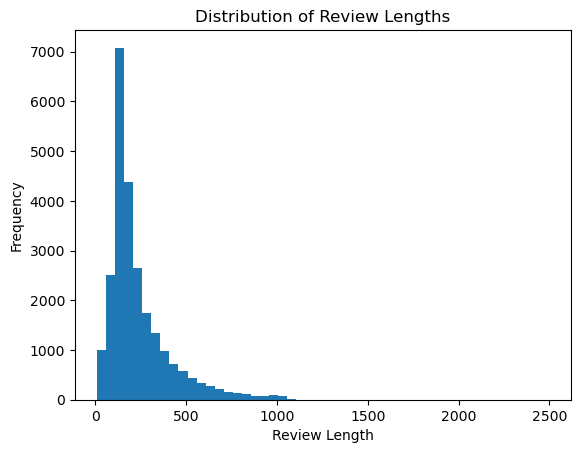

In [10]:
import matplotlib.pyplot as plt

# Get the lengths of the reviews
review_lengths = [len(review) for review in x_train]

# Plot the review lengths
plt.hist(review_lengths, bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')

### Display the distribution of movie review sentiment

Text(0.5, 1.0, 'Class Distribution of IMDB Movie Reviews')

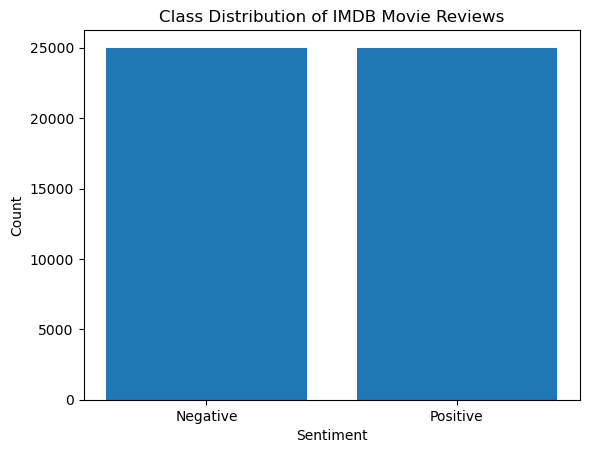

In [12]:
# Concatenate the labels of the training and testing sets
labels = np.concatenate((y_train, y_test), axis=0)

# Count the occurrences of each class
class_counts = np.bincount(labels)

# Define class labels
class_labels = ['Negative', 'Positive']

# Plot the bar chart
plt.bar(class_labels, class_counts)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Class Distribution of IMDB Movie Reviews')

### Generate word cloud of most common used word

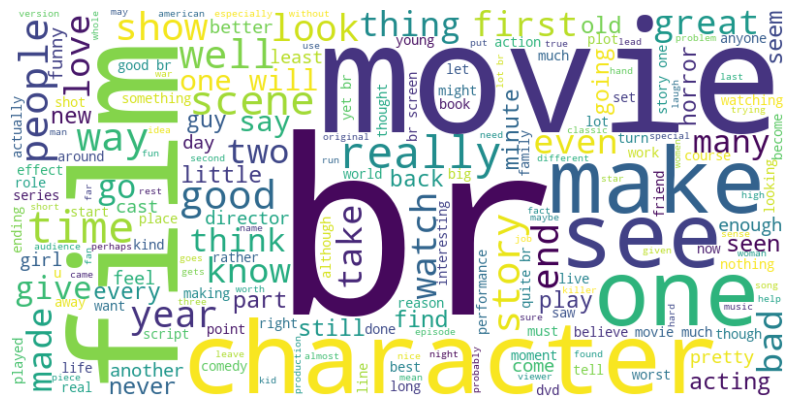

In [14]:
from wordcloud import WordCloud

# Convert the index to words
word_index = imdb.get_word_index()
reverse_word_index = {index: word for word, index in word_index.items()}
all_words = [reverse_word_index.get(word, '') for review in x_test for word in review]

# Join the words into a single string
all_text = ' '.join(all_words)

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Pad review sequences

The goal is to **preprocess the movie review data by padding the sequences to a fixed length**. 

The `sequence.pad_sequences()` function is used to ensure that all movie reviews have the same length (`maxlen`). This padding is necessary because **RNNs typically require inputs of fixed dimensions**. 


The code then splits the dataset into training and validation sets, where the first 10,000 samples are set aside as the validation set, while the remaining samples are used for training

In [16]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Prepare the dataset
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

print("Training shape: ", x_train.shape)
print("Testing shape: ", x_test.shape)
print("Validation shape: ", x_val.shape)


Training shape:  (20000, 200)
Testing shape:  (25000, 200)
Validation shape:  (5000, 200)


## Building the Recurrent Neural Network

The network uses an embedding layer to convert words into dense vectors, an LSTM layer to capture sequential dependencies, and a dense output layer for binary classification based on the sentiment of the movie reviews.

- **Embedding Layer**: The network begins with an embedding layer that converts the input words into dense vectors of fixed dimensions (128 in this case). This layer helps capture the semantic meaning and relationships between words in the movie reviews.



- **LSTM Layer**: A Long Short-Term Memory (LSTM) layer follows the embedding layer. LSTMs are a type of recurrent neural network (RNN) that can effectively capture long-term dependencies in sequential data. The layer consists of 128 LSTM units and includes dropout regularization to prevent overfitting.



- **Output Layer**: The final layer of the network is a dense layer with a single neuron and a sigmoid activation function. This layer produces a binary output, indicating the sentiment of the movie review (positive or negative).

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build the RNN model
model = Sequential()
model.add(Embedding(max_features, 128))  # Embedding layer to convert words into dense vectors
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile the model

- The choice of the loss function, `binary_crossentropy`, is suitable for binary classification tasks, such as sentiment analysis, where the goal is to predict one of two classes (positive or negative sentiment). 


- The `Adam` optimizer is selected as it is an efficient optimization algorithm commonly used for training neural networks. 


- By optimizing the model using the `loss` function and the Adam optimizer, the network aims to minimize the cross-entropy loss and improve its accuracy in predicting the sentiment of movie review


In [23]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


## Train the model

The model is trained using the training data `(x_train` and `y_train`).  Additionally, it uses the validation data (`x_val` and `y_val`) to monitor the model's performance during training. 

The model is trained by iterating over the specified number of epochs (5 in our case), updating its parameters based on the training data, and evaluating its performance on the validation data.

In [25]:

# Train the model
print('Training the model...')
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_val, y_val))


Training the model...
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 272ms/step - accuracy: 0.6971 - loss: 0.5552 - val_accuracy: 0.7486 - val_loss: 0.5196
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 277ms/step - accuracy: 0.8103 - loss: 0.4240 - val_accuracy: 0.8048 - val_loss: 0.4234
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 272ms/step - accuracy: 0.8588 - loss: 0.3357 - val_accuracy: 0.8294 - val_loss: 0.3937
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 213s 290ms/step - accuracy: 0.8797 - loss: 0.2950 - val_accuracy: 0.8592 - val_loss: 0.3497
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 205s 295ms/step - accuracy: 0.9247 - loss: 0.1987 - val_accuracy: 0.8608 - val_loss: 0.3397


## Evaluate

The evaluation step helps assess how well the trained model generalizes to new movie reviews and provides an indication of its overall effectiveness in predicting the sentiment of movie reviews.

We evaluate the trained model using the testing data (`x_test` and `y_test`). It computes the loss and accuracy of the model's predictions on the test data. The batch size is specified to control the number of samples processed at once during evaluation. The obtained test loss and accuracy are then printed, providing insights into the model's performance on unseen data. 

In [28]:


# Evaluate the model
print('Evaluating the model...')
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Evaluating the model...
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.8545 - loss: 0.3502
Test loss: 0.34772899746894836
Test accuracy: 0.8553599715232849


## Visualize accuracy

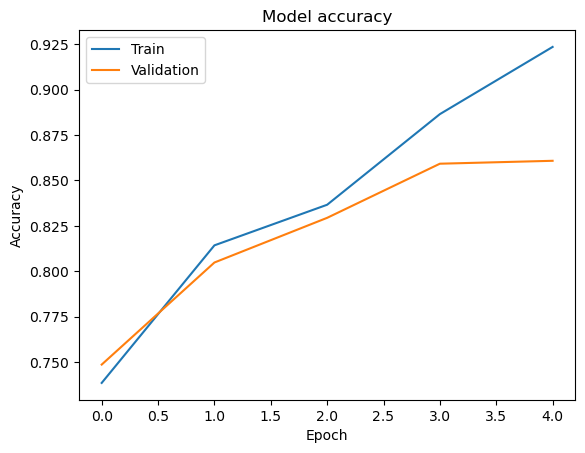

In [30]:
# Now, let's plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()